## Plotting with Histogram

In [2]:
import pandas as pd
from pymc3 import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df1 = pd.read_csv('../data/2014.12.17 OneEigth in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df2 = pd.read_csv('../data/2014.12.17 OneFourth in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df3 = pd.read_csv('../data/2014.12.17 OneHalf in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df4 = pd.read_csv('../data/2014.12.17 ThreeFourths in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')
df5 = pd.read_csv('../data/2014.12.17 One in Si post', header=None , names = ['Time', 'Temp'],  delimiter = '\t')


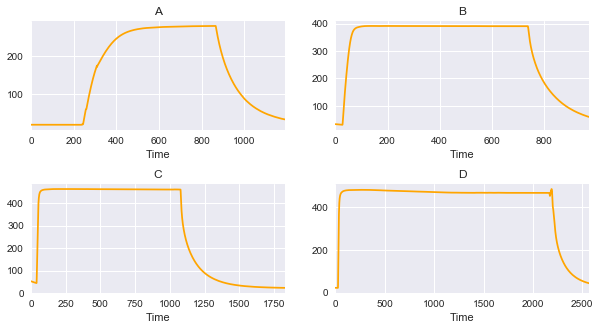

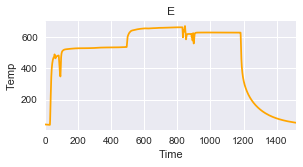

In [5]:
#df2['Temp'] = df2['Temp'] + 273.15 #Converting Celcius to Kelvin
#Time is recorded in seconds. 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=.5)
df1.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,1]); axes[1,1].set_title('D');

df5.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, figsize=(4.5, 2), title ='E')
plt.ylabel('Temp',rotation=90);

In [6]:
#isolating the thermal decay curve with a time condition from above and removing noisy measurements near room temperature. 
df1 = df1[ (df1.Time > 600) & (df1.Temp > 100) & (df1.Temp < 271)]
df2 = df2[ (df2.Time > 600) & (df2.Temp > 100) & (df2.Temp < 370)]
df3 = df3[ (df3.Time > 1000) & (df3.Temp > 100) & (df3.Temp < 420)]
df4 = df4[ (df4.Time > 2200) & (df4.Temp > 100) & (df4.Temp < 325)]
df5 = df5[ (df5.Time > 1200) & (df5.Temp > 100) & (df5.Temp < 530)]

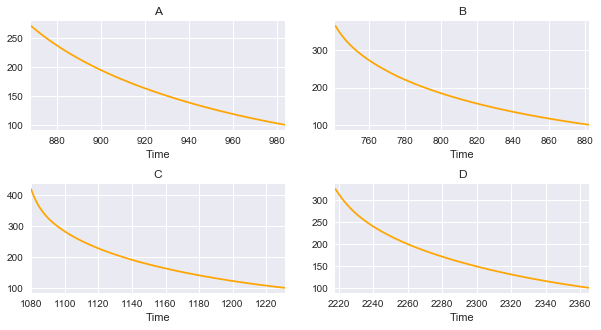

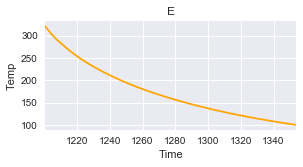

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.subplots_adjust(hspace=.5)
df1.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, ax=axes[1,1]); axes[1,1].set_title('D');

df5.plot(x = 'Time', y = 'Temp', color = 'orange', legend = False, figsize=(4.5, 2), title ='E')
plt.ylabel('Temp',rotation=90);

In [8]:
#Establish constants and solve for emmisivity 
# Use a two point numerical derivative 

def em_column(df):
    #Reset the index for easy iteration 
    df.reset_index(inplace = True, drop = True)
    
    #Constants: sigma [J/(m^2*s*K^4)]; m, mass in kilograms; T0 in K; A, area in m^2
    a = 0.0002
    T0 = 22 + 273.15
    sigma = 5.670373e-08  
    m = 0.0000693  
    
      #Converts Celcius to Kelvin
    df['TempK'] = df['Temp'] + 273.15 
    
    #heat capacity for silicon as a function of temperature. 
    #Chase, M.W., Jr., NIST-JANAF Themochemical Tables, Fourth Edition, J. Phys. Chem. Ref. Data, Monograph 9, 1998, 1-1951.
    #Cp° = A + B*t + C*t2 + D*t3 + E/t2
    #t = T (K)/1000
    #moles in a gram 28.0855
    c = lambda x: ( 22.81719 + 3.89951*( x / 1000 ) - 0.082885*( x/1000)**2 + 0.04211*(x/1000)**3 - 0.354063/( ( x/1000)**2 ) ) /28.0855*1000
    
    #Gives 'em'  column correct length
    df[ 'em' ] = np.nan
    
    #Solve for heat capacity 
    df[ 'Cp'] = c( df.TempK )
    
    #iterate through columns and solve for emissivity        
    for i in range(1, len(df) -1):
        num_derivative =  ( df.Temp[i +1] - df.Temp[i - 1] )*( df.Time[ i+1] - df.Time[i-1] )
        numerator =  -m*( df[ 'Cp' ][i] ) * num_derivative
        denom =  a*sigma*( df.TempK[ i ]**4 - T0**4 )
        df['em'][i] = numerator / denom       
        
    #Make temperature ascending 
    #df.sort_values(['Temp'], ascending=True, inplace =True)
    #Reset the index for easy data cleaning 
    #df.reset_index(inplace = True, drop = True)

In [9]:
#Solve emissivity for all data sets 
em_column(df1)
em_column(df2)
em_column(df3)
em_column(df4)
em_column(df5)

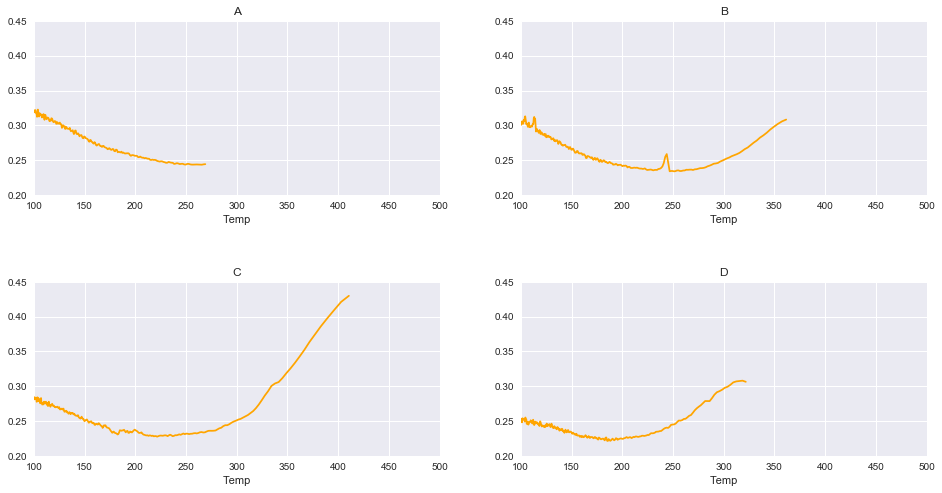

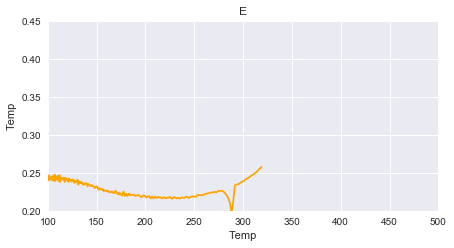

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
fig.subplots_adjust(hspace=.5)
df1.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.2,.45), xlim = (100,500), legend = False, ax=axes[0,0]); axes[0,0].set_title('A')
df2.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.2,.45),  xlim = (100,500), legend = False, ax=axes[0,1]); axes[0,1].set_title('B')
df3.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.2,.45),  xlim = (100,500), legend = False, ax=axes[1,0]); axes[1,0].set_title('C')
df4.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.2,.45),  xlim = (100,500), legend = False, ax=axes[1,1]); axes[1,1].set_title('D');

df5.plot(y = 'em', x = 'Temp', color = 'orange', ylim = (0.2,.45),  xlim = (100,500), legend = False, figsize=(7,3.5), title ='E')
plt.ylabel('Temp',rotation=90);

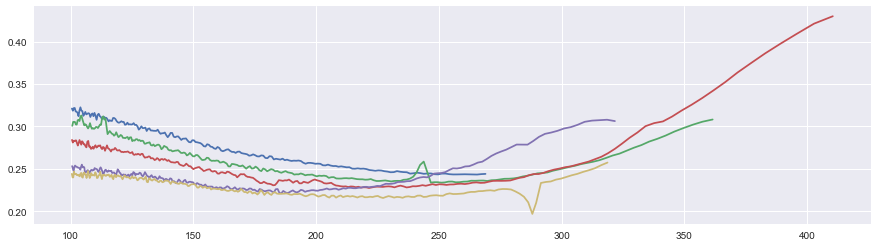

In [12]:
#Plot all emissivities 
plt.figure(figsize=(15,4))
plt.plot(df1.Temp, df1.em, df2.Temp, df2.em, df3.Temp, df3.em, df4.Temp, df4.em,df5.Temp,df5.em )
plt.show()

In [ ]:
#convert the above plots to a scatter plot then solve for linear regression with Bayes using PYMC3, Add key words to Readme file 

In [13]:
df = pd.concat( [ df1[['Temp','em']], df2[['Temp','em']],df3[['Temp','em']],df5[['Temp','em']]    ], ignore_index = True)


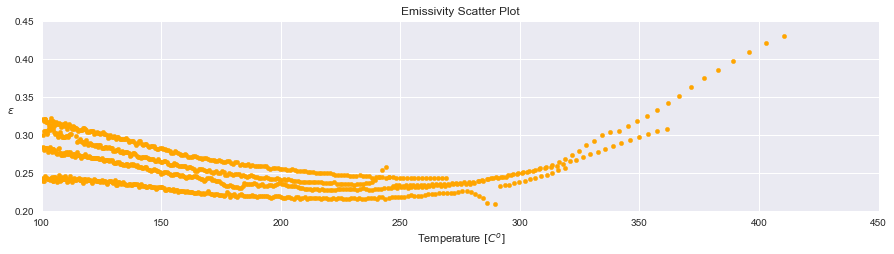

In [14]:
df.plot.scatter(y = 'em', x = 'Temp', color = 'orange', ylim = (0.2,.45),  xlim = (100,450), legend = False, figsize=(15,3.5), title ='Emissivity Scatter Plot')
plt.xlabel(' Temperature $[C^o]$', rotation = 0)
plt.ylabel('$\epsilon$', rotation = 0);

## Fitting data to sigmoid function 

In [15]:
#Clean up data by dropping NaN and sorting by Temperature values. 
df.sort_values(by='Temp', inplace = True)
df.dropna(axis=0, how='any', inplace =True )
df = df[  (df.Temp > 250)]

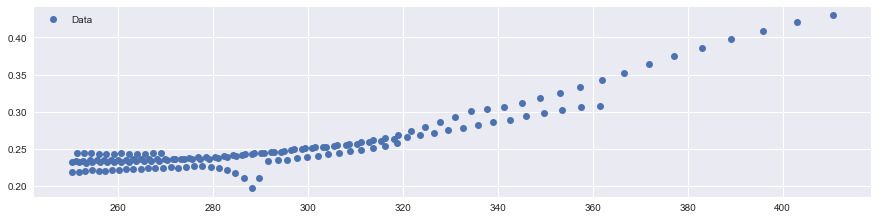

In [16]:
plt.figure(figsize=(15, 3.5))
plt.plot(df['Temp'], df['em'], 'o'b, label = 'Data')
#plt.plot(df250['x'], df250['x']*trace_robust['x'].mean()+trace_robust['Intercept'].mean() , '-', label = 'Linear Regression')
plt.legend();

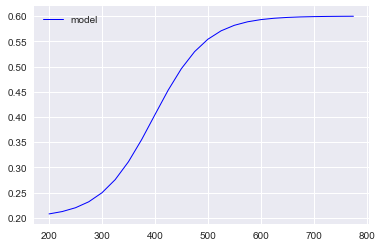

In [22]:
x = np.arange(200,800,25)

# Parameters for tanh
y_intercept = 0.2
s_amp = .4
x_coef = .02
x_offset =  7.957

#Sigmoid function 
sigmoid = lambda x, amp, coef, offset,intercept: intercept + amp*( 1/(1+np.exp(-x*coef + offset)) )
s_true = sigmoid(x = x, amp = s_amp, coef = x_coef, offset = x_offset, intercept = y_intercept)

plt.plot(x,s_true,'b', marker='None', ls='-', lw=1, label='model')
plt.legend();

In [32]:
s = np.asarray(df['em'])
x = np.asarray(df['Temp'])

In [33]:
with Model() as model3:
    intercept = Uniform('intercept', 0.05, 0.4)
    amp = Uniform('amp', 0, 1)
    coef = Uniform('coef', 0,1)
    offset = Uniform('offset', 0, 10, testval= 8.5)
    tau = Uniform('tau', 0, 1000)


    sigmoid=Deterministic('sigmoid', intercept + amp*( 1/(1+np.exp(-x*coef + offset)) ) )

    y =Normal('y', mu=sigmoid, tau=tau, observed=s)

  
    trace=sample(2000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = -256.56:  10%|█         | 20017/200000 [00:04<00:39, 4569.97it/s]
Convergence archived at 20300
Interrupted at 20,300 [10%]: Average Loss = 584.04
100%|█████████▉| 2999/3000 [07:32<00:00,  6.65it/s]/Users/cristian/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:448: UserWarning: Chain 0 reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
  'reparameterize.' % self._chain_id)
/Users/cristian/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:456: UserWarning: Chain 0 contains 10 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 3000/3000 [07:32<00:00,  6.63it/s]


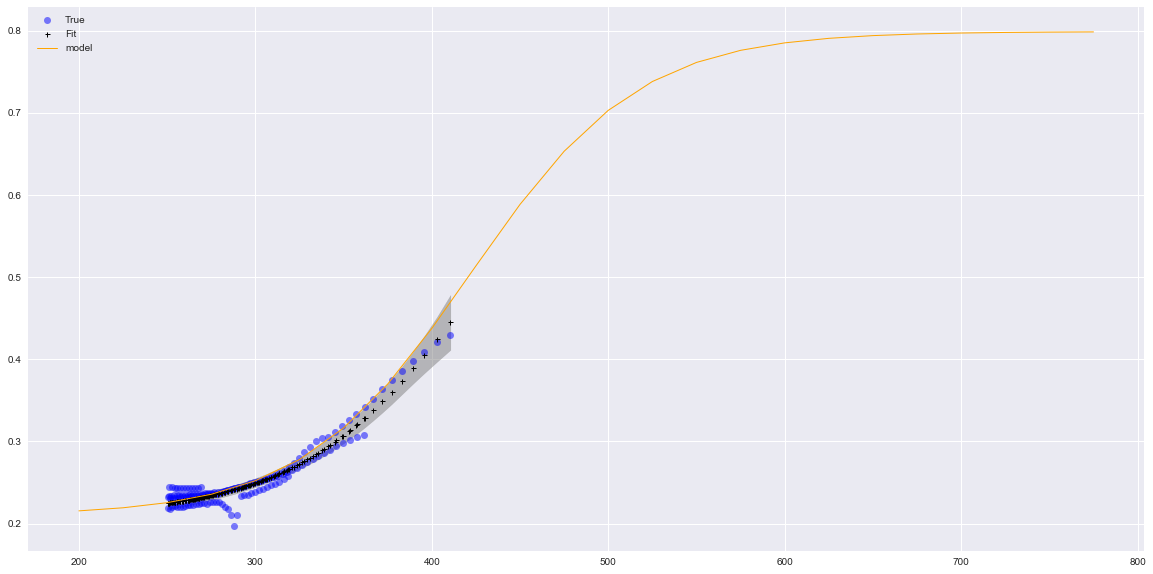

In [70]:
# extract and plot results
plt.figure(figsize=(20,10))
y_min = np.percentile(trace.sigmoid,2.5,axis=0)
y_max = np.percentile(trace.sigmoid,97.5,axis=0)
y_fit = np.percentile(trace.sigmoid,50,axis=0)
plt.plot(df['Temp'],df['em'],'b',  alpha=0.5, marker='o',ls='None', label='True')
#plt.errorbar(x,s,yerr=s_error, color='r', marker='.', ls='None', label='Observed')
plt.plot(df['Temp'],y_fit,'k', marker='+', ls='None', ms=5, mew=1, label='Fit')
plt.fill_between(df['Temp'], y_min, y_max, color='0.5', alpha=0.5)
plt.plot(x,s_true,'orange', marker='None', ls='-', lw=1, label='model')

plt.legend();

In [45]:
summary(trace)


intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.210            0.008            0.000            [0.193, 0.223]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.190          0.206          0.211          0.216          0.222


amp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.589            0.161            0.015            [0.307, 0.903]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.312          0.469          0.599          0.692          0.914


coef:

  Mean             SD               MC Error         95% HPD interval
  ------------------------

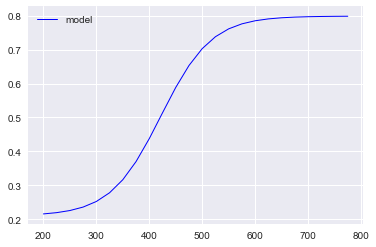

In [59]:
x = np.arange(200,800,25)

# Parameters for tanh
y_intercept = 0.21
s_amp = .589
x_coef = .021
x_offset =  8.862

#Sigmoid function 
sigmoid = lambda x, amp, coef, offset,intercept: intercept + amp*( 1/(1+np.exp(-x*coef + offset)) )
s_true = sigmoid(x = x, amp = s_amp, coef = x_coef, offset = x_offset, intercept = y_intercept)

plt.plot(x,s_true,'b', marker='None', ls='-', lw=1, label='model')
plt.legend();

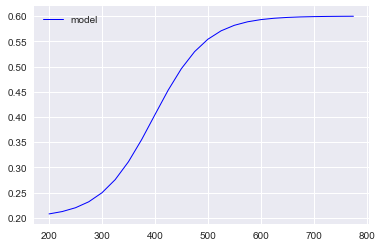

In [3]:
x = np.arange(200,800,25)

# Parameters for tanh
y_intercept = 0.2
s_amp = .4
x_coef = .02
x_offset =  7.957

#Sigmoid function 
sigmoid = lambda x, amp, coef, offset,intercept: intercept + amp*( 1/(1+np.exp(-x*coef + offset)) )
s_true = sigmoid(x = x, amp = s_amp, coef = x_coef, offset = x_offset, intercept = y_intercept)

plt.plot(x,s_true,'b', marker='None', ls='-', lw=1, label='model')
plt.legend();